In [1]:
from google.colab import drive
drive.mount('/content/drive')

CANDIDATE_NAME = "RohanJoshi"
BASE_DIR = f"/content/drive/MyDrive/ds_{CANDIDATE_NAME}"

CSV_FOLDER  = f"{BASE_DIR}/csv_files"
OUTPUT_FOLDER = f"{BASE_DIR}/outputs"
REPORT_FILE = f"{BASE_DIR}/ds_report.pdf"

import os
for folder in [BASE_DIR, CSV_FOLDER, OUTPUT_FOLDER]:
    os.makedirs(folder, exist_ok=True)

!apt-get install tree -qq > /dev/nul
!tree "{BASE_DIR}"

Mounted at /content/drive
/content/drive/MyDrive/ds_RohanJoshi
├── csv_files
│   ├── daily_aggregates.csv
│   ├── dataset_account_daily.csv
│   ├── dataset_per_trade_cluster_0.csv
│   ├── dataset_per_trade_cluster_1.csv
│   ├── dataset_per_trade_cluster_2.csv
│   ├── dataset_per_trade_cluster_3.csv
│   ├── dataset_per_trade_high_leverage.csv
│   ├── dataset_per_trade_low_leverage.csv
│   ├── dataset_symbol_daily.csv
│   ├── model_outputs
│   │   ├── lightgbm_feature_importances.csv
│   │   ├── lightgbm_shap_summary.csv
│   │   ├── rf_feature_importances.csv
│   │   └── xgboost_feature_importances.csv
│   ├── sentiment_regimes.csv
│   ├── sentiment_transition_stats.csv
│   ├── trader_clusters.csv
│   ├── trades_cleaned.csv
│   ├── trades_feature_engineered.csv
│   ├── trades_final_cleaned.csv
│   ├── trades_merged (1).gsheet
│   ├── trades_merged (2).gsheet
│   ├── trades_merged.csv
│   ├── trades_merged.gsheet
│   ├── trades_model_ready.csv
│   ├── trades_ultimate_features.csv
│   └── 

In [7]:
!pip install -q pandas matplotlib seaborn plotly pyarrow scipy sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 91.7 MB/s eta 0:00:00


In [4]:
!pip install -q pandas matplotlib seaborn plotly pyarrow scipy

# Imports
import os
import json
from datetime import timezone
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
os.makedirs('csv_files', exist_ok=True)
os.makedirs('outputs', exist_ok=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
historical_data_path = '/content/drive/MyDrive/historical_data.csv'
fear_greed_index_path = '/content/drive/MyDrive/fear_greed_index.csv'

historical_data = pd.read_csv(historical_data_path)
fear_greed_index = pd.read_csv(fear_greed_index_path)

In [ ]:
print("Shape of historical_data:", historical_data.shape)
print("Shape of fear_greed_index:", fear_greed_index.shape)

Shape of historical_data: (211224, 16)
Shape of fear_greed_index: (2644, 4)


In [ ]:
display(historical_data.head())
historical_data.info()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [ ]:
display(fear_greed_index.head())
fear_greed_index.info()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import sweetviz as sv
import os

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
pd.set_option('display.max_columns', 50)

TRADES_CSV = historical_data_path
SENTIMENT_CSV = fear_greed_index_path

In [9]:
import warnings
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

def load_csv(path):
    print(f"Loading: {path}")
    df = pd.read_csv(path, low_memory=False)
    print(f"Loaded {df.shape[0]:,} rows × {df.shape[1]} cols")
    return df
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    trades = load_csv(TRADES_CSV)
    sentiment = load_csv(SENTIMENT_CSV)

display(trades.head())
display(sentiment.head())

Loading: /content/drive/MyDrive/historical_data.csv
Loaded 211,224 rows × 16 cols
Loading: /content/drive/MyDrive/fear_greed_index.csv
Loaded 2,644 rows × 4 cols


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [10]:
from sklearn.ensemble import IsolationForest

def remove_outliers(df, cols, contamination=0.01):
    """
    Removes outliers using Isolation Forest for selected columns.
    Returns cleaned DataFrame and the outlier mask.
    """
    if not all(col in df.columns for col in cols):
        raise ValueError("Some columns for outlier detection are missing in DataFrame.")

    clf = IsolationForest(contamination=contamination, random_state=42)
    mask = clf.fit_predict(df[cols])
    cleaned_df = df[mask == 1].copy()
    return cleaned_df, mask

# Example usage:
numeric_cols = [c for c in trades.select_dtypes(include='number').columns if 'id' not in c.lower()]
trades_clean, mask = remove_outliers(trades, numeric_cols, contamination=0.02)
print(f"Removed {len(trades) - len(trades_clean)} outlier trades")

Removed 4225 outlier trades


In [11]:
possible_time_cols = [c for c in trades.columns if 'time' in c.lower() or 'timestamp' in c.lower() or 'date' in c.lower()]
print("Candidate time columns in trades:", possible_time_cols)
time_col = None
for c in possible_time_cols:
    if c.lower() == 'time':
        time_col = c
        break
if time_col is None and possible_time_cols:
    time_col = possible_time_cols[0]

print("Using time column:", time_col)
# Robust datetime parsing function
def parse_time_column(df, col, unit_guess=None, utc=True):
    s = df[col]
    # If numeric, guess epoch (ms vs s)
    if np.issubdtype(s.dtype, np.number):
        # Heuristic: >1e12 likely milliseconds
        if unit_guess is None:
            median = float(np.nanmedian(s.dropna()))
            if median > 1e12:
                unit = 'ms'
            elif median > 1e9:
                unit = 's'
            else:
                unit = 's'
        else:
            unit = unit_guess
        print(f"Parsing numeric epoch column {col} as {unit}")
        df[col + '_dt'] = pd.to_datetime(s, unit=unit, utc=utc, errors='coerce')
    else:
        # Try ISO parsing
        print(f"Parsing string timestamps in column {col} with to_datetime")
        df[col + '_dt'] = pd.to_datetime(s, utc=utc, errors='coerce')
    # Report parsing failures
    n_null = df[col + '_dt'].isna().sum()
    print(f"Parsed datetimes; parsing failures: {n_null} / {len(df)}")
    return df

# Apply
if time_col is None:
    raise ValueError("No time column found in trades - update the heuristics or pass the column name.")
trades = parse_time_column(trades, time_col)
# Sentiment date parsing
sent_date_col = None
for c in sentiment.columns:
    if 'date' in c.lower():
        sent_date_col = c
        break
if sent_date_col is None:
    # fallback to first column
    sent_date_col = sentiment.columns[0]
print("Sentiment date column:", sent_date_col)

sentiment[sent_date_col] = pd.to_datetime(sentiment[sent_date_col], errors='coerce').dt.tz_localize(None)  # naive dates ok
print("Sentiment date parse failures:", sentiment[sent_date_col].isna().sum())
sentiment.head()

Candidate time columns in trades: ['Timestamp IST', 'Timestamp']
Using time column: Timestamp IST
Parsing string timestamps in column Timestamp IST with to_datetime
Parsed datetimes; parsing failures: 131999 / 211224
Sentiment date column: date
Sentiment date parse failures: 0


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


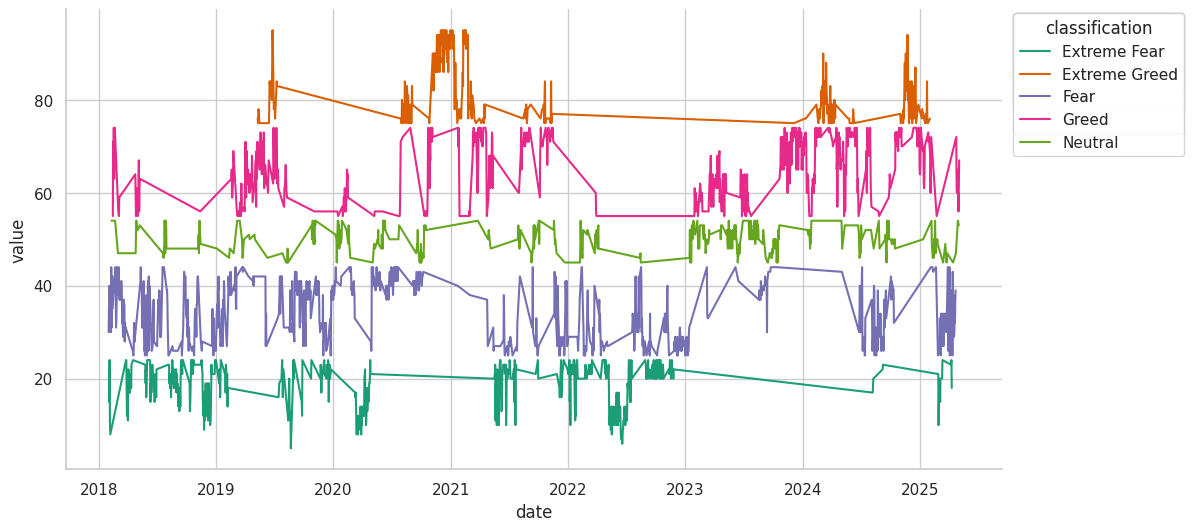

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['value']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = sentiment.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('classification')):
  _plot_series(series, series_name, i)
  fig.legend(title='classification', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('value')

In [13]:
def validation_report(df, name="df", max_rows=20):
    print(f"=== Validation report for {name} ===")
    print("Shape:", df.shape)
    print("\nColumns and types:")
    print(df.dtypes)
    print("\nMissingness (top 20):")
    miss = df.isna().sum().sort_values(ascending=False)
    display(miss.head(max_rows))
    print("\nSample unique value counts (selected cols):")
    for c in df.columns[:10]:
        try:
            print(c, "unique:", df[c].nunique(dropna=False))
        except Exception:
            pass

validation_report(trades, "trades")
validation_report(sentiment, "sentiment")

=== Validation report for trades ===
Shape: (211224, 17)

Columns and types:
Account                          object
Coin                             object
Execution Price                 float64
Size Tokens                     float64
Size USD                        float64
Side                             object
Timestamp IST                    object
Start Position                  float64
Direction                        object
Closed PnL                      float64
Transaction Hash                 object
Order ID                          int64
Crossed                            bool
Fee                             float64
Trade ID                        float64
Timestamp                       float64
Timestamp IST_dt    datetime64[ns, UTC]
dtype: object

Missingness (top 20):


,0
Timestamp IST_dt,131999
Account,0
Coin,0
Size Tokens,0
Execution Price,0
Side,0
Timestamp IST,0
Start Position,0
Size USD,0
Direction,0



Sample unique value counts (selected cols):
Account unique: 32
Coin unique: 246
Execution Price unique: 60162
Size Tokens unique: 59304
Size USD unique: 118493
Side unique: 2
Timestamp IST unique: 27977
Start Position unique: 196923
Direction unique: 12
Closed PnL unique: 90720
=== Validation report for sentiment ===
Shape: (2644, 4)

Columns and types:
timestamp                  int64
value                      int64
classification            object
date              datetime64[ns]
dtype: object

Missingness (top 20):


,0
timestamp,0
value,0
classification,0
date,0



Sample unique value counts (selected cols):
timestamp unique: 2644
value unique: 90
classification unique: 5
date unique: 2644


In [ ]:
# Important numeric columns commonly present — adapt names as in your CSV
numeric_candidates = [c for c in trades.columns if trades[c].dtype.kind in 'biufc']
print("Numeric columns detected:", numeric_candidates)

# If column names for PnL/leverage/size are different, map them here:
# Example mapping (adjust to your CSV)
col_map = {
    'closedPnl' : None,           # replace with actual if different
    'closedPnL' : None,
    'closedPnL' : None,
    'leverage'  : None,
    'size'      : None,
    'execution price': None
}
# identify likely columns by name substring
def pick_col(df, substrings):
    for s in substrings:
        for c in df.columns:
            if s.lower() in c.lower():
                return c
    return None

closed_pnl_col = pick_col(trades, ['closedpnl', 'closed_pnl', 'pnl', 'closedpnl'])
leverage_col = pick_col(trades, ['leverage', 'lev'])
size_col = pick_col(trades, ['size', 'quantity', 'qty', 'amount'])
price_col = pick_col(trades, ['price', 'execution price', 'exec_price','executionprice'])

print("Detected columns -> closed_pnl:", closed_pnl_col, "leverage:", leverage_col, "size:", size_col, "price:", price_col)

Numeric columns detected: ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
Detected columns -> closed_pnl: Closed PnL leverage: None size: Size Tokens price: Execution Price


In [ ]:
# Quick sanity
if closed_pnl_col:
    print("PnL stats:")
    display(trades[closed_pnl_col].describe())
if leverage_col:
    print("Leverage stats:")
    display(trades[leverage_col].describe())
if size_col:
    print("Size stats:")
    display(trades[size_col].describe())

PnL stats:


,Closed PnL
count,211224.000000
mean,48.749001
std,919.164828
min,-117990.104100
25%,0.000000
50%,0.000000
75%,5.792797
max,135329.090100


Size stats:


,Size Tokens
count,2.112240e+05
mean,4.623365e+03
std,1.042729e+05
min,8.740000e-07
25%,2.940000e+00
50%,3.200000e+01
75%,1.879025e+02
max,1.582244e+07


In [ ]:
# Duplicates by full row or by unique trade id if exists
trade_id_col = pick_col(trades, ['id', 'tradeid', 'orderid'])
print("Candidate trade ID:", trade_id_col)
print("Full-row duplicates:", trades.duplicated().sum())
if trade_id_col:
    print("Duplicate trade IDs:", trades[trade_id_col].duplicated().sum())

# Outlier detection for numeric columns by IQR
def outlier_summary(series):
    q1, q3 = series.quantile([0.25,0.75])
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return {'q1':q1,'q3':q3,'iqr':iqr, 'lower':lower,'upper':upper,
            'n_below':(series < lower).sum(), 'n_above':(series > upper).sum()}

if leverage_col:
    print("Leverage outlier summary:", outlier_summary(trades[leverage_col].dropna()))
if closed_pnl_col:
    print("PnL outlier summary:", outlier_summary(trades[closed_pnl_col].dropna()))

Candidate trade ID: Side
Full-row duplicates: 0
Duplicate trade IDs: 211222
PnL outlier summary: {'q1': 0.0, 'q3': 5.79279675, 'iqr': 5.79279675, 'lower': -8.689195125, 'upper': 14.481991874999999, 'n_below': np.int64(9221), 'n_above': np.int64(39720)}


In [ ]:
tr = trades.copy()

# canonical datetime
tr['time_utc'] = tr[time_col + '_dt']  # from parse step
# trade_date (date) for merging with daily sentiment
tr['trade_date'] = tr['time_utc'].dt.date

# numeric conversions with coercion
num_map = {leverage_col:'leverage', closed_pnl_col:'closedPnL', size_col:'size', price_col:'execution_price'}
for orig, new in num_map.items():
    if orig:
        tr[new] = pd.to_numeric(tr[orig], errors='coerce')

# Derived notional where possible
if 'size' in tr.columns and 'execution_price' in tr.columns:
    tr['notional'] = tr['size'] * tr['execution_price']

# Add Asia/Kolkata localized time for reporting (do not use for merging)
tr['time_ist'] = tr['time_utc'].dt.tz_convert('Asia/Kolkata')

# Save cleaned
tr.to_parquet('csv_files/clean_trades.parquet', index=False)
print("Saved cleaned trades to csv_files/clean_trades.parquet")

Saved cleaned trades to csv_files/clean_trades.parquet


In [ ]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

agg_daily = tr.groupby('trade_date').agg(
    trade_count=('trade_date','size'),
    avg_closedPnL=('closedPnL','mean'),
    total_notional=('notional','sum'),
).reset_index()

agg_daily['trade_date'] = pd.to_datetime(agg_daily['trade_date']).dt.date


agg_daily = agg_daily.merge(
    sentiment[['date','value', 'classification']],
    left_on='trade_date',
    right_on='date',
    how='left'
).drop('date', axis=1)

tr.to_csv(f"{CSV_FOLDER}/trades_merged.csv", index=False)
print(f"Saved trade-level merged dataset to {CSV_FOLDER}/trades_merged.csv")

agg_daily.to_csv(f"{CSV_FOLDER}/daily_aggregates.csv", index=False)
print(f"Saved daily aggregates to {CSV_FOLDER}/daily_aggregates.csv")

Saved trade-level merged dataset to /content/drive/MyDrive/ds_RohanJoshi/csv_files/trades_merged.csv
Saved daily aggregates to /content/drive/MyDrive/ds_RohanJoshi/csv_files/daily_aggregates.csv


In [ ]:
# === MERGE WITH SENTIMENT DATA ===
# Rename columns in fear_greed_index for consistency
date_col = next((c for c in fear_greed_index.columns if 'date' in c.lower()), fear_greed_index.columns[0])
sent_col = next((c for c in fear_greed_index.columns if 'class' in c.lower() or 'sentiment' in c.lower()), fear_greed_index.columns[1])

fear_greed_index['sent_date'] = pd.to_datetime(fear_greed_index[date_col], errors='coerce').dt.date
fear_greed_index = fear_greed_index[['sent_date', sent_col]].rename(columns={sent_col: 'sentiment'})

# Add trade_date to historical_data
time_col = next((c for c in historical_data.columns if 'time' in c.lower() or 'timestamp' in c.lower()), None)
if time_col is None:
    raise ValueError("No time column found in trades data!")

if np.issubdtype(historical_data[time_col].dtype, np.number):
    unit = 'ms' if historical_data[time_col].median() > 1e12 else 's'
    historical_data['time_utc'] = pd.to_datetime(historical_data[time_col], unit=unit, utc=True)
else:
    historical_data['time_utc'] = pd.to_datetime(
    historical_data[time_col],
    dayfirst=True,          # because format is DD-MM-YYYY
    errors='coerce',        # avoids crash on bad/missing values
    utc=True                # ensures UTC timezone
)


historical_data['time_ist'] = historical_data['time_utc'].dt.tz_convert('Asia/Kolkata')
historical_data['trade_date'] = historical_data['time_utc'].dt.date

# Merge sentiment
historical_data = historical_data.merge(fear_greed_index, left_on='trade_date', right_on='sent_date', how='left')

# === DERIVED FEATURES ===
leverage_col = next((c for c in historical_data.columns if 'leverage' in c.lower()), None)
size_col = next((c for c in historical_data.columns if 'size' in c.lower()), None)
price_col = next((c for c in historical_data.columns if 'price' in c.lower()), None)
pnl_col = next((c for c in historical_data.columns if 'pnl' in c.lower()), None)

if size_col and price_col:
    historical_data['notional'] = pd.to_numeric(historical_data[size_col], errors='coerce') * pd.to_numeric(historical_data[price_col], errors='coerce')

if pnl_col and 'notional' in historical_data:
    historical_data['pnl_pct'] = pd.to_numeric(historical_data[pnl_col], errors='coerce') / historical_data['notional'].replace({0:np.nan})

if pnl_col:
    historical_data['profit_flag'] = (historical_data[pnl_col] > 0).astype(int)

# === DAILY AGGREGATION ===
agg_daily = historical_data.groupby('trade_date').agg(
    trade_count=('trade_date','size'),
    avg_leverage=(leverage_col,'mean') if leverage_col else ('trade_date','size'),
    median_leverage=(leverage_col,'median') if leverage_col else ('trade_date','size'),
    avg_pnl_pct=('pnl_pct','mean') if 'pnl_pct' in historical_data else ('trade_date','size'),
    total_notional=('notional','sum') if 'notional' in historical_data else ('trade_date','size'),
    win_rate=('profit_flag','mean') if 'profit_flag' in historical_data else ('trade_date','size')
).reset_index()

# Merge sentiment to daily aggregates
agg_daily = agg_daily.merge(
    historical_data[['trade_date','sentiment']].drop_duplicates('trade_date'),
    on='trade_date', how='left'
)

# === SAVE OUTPUTS ===
historical_data.to_csv(f"{CSV_FOLDER}/trades_merged.csv", index=False)
agg_daily.to_csv(f"{CSV_FOLDER}/daily_aggregates.csv", index=False)

print(f"Saved merged trades dataset to: {CSV_FOLDER}/trades_merged.csv")
print(f"Saved daily aggregates dataset to: {CSV_FOLDER}/daily_aggregates.csv")


Saved merged trades dataset to: /content/drive/MyDrive/ds_RohanJoshi/csv_files/trades_merged.csv
Saved daily aggregates dataset to: /content/drive/MyDrive/ds_RohanJoshi/csv_files/daily_aggregates.csv
